### Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 

Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and second column represent exchange rates USD to Australian Dollar.

Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

Part 3: Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

Part 4: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

Deliverables:
•	Include visualizations and explanations for the choices and findings at each step.
•	Well-commented Python code that used to conduct the analysis and build the models.

Assessment Criteria:
•	Accuracy and completeness of the data preparation and exploration steps.
•	Justification for model selection and parameter tuning decisions.
•	Clarity and depth of the analysis in the diagnostics and model evaluation stages.

This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [38]:
df=pd.read_csv('exchange_rate.csv')

In [39]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [40]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [41]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [43]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [44]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7583    False
7584    False
7585    False
7586    False
7587    False
Length: 7588, dtype: bool

In [45]:
# Converting to DataFrame
exchange_rates = pd.DataFrame(df)

In [46]:
# Converting 'date' to datetime and setting as index
exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], format='%d-%m-%Y %H:%M')
exchange_rates.set_index('date', inplace=True)

In [47]:
# Display the first few rows
exchange_rates.head()

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


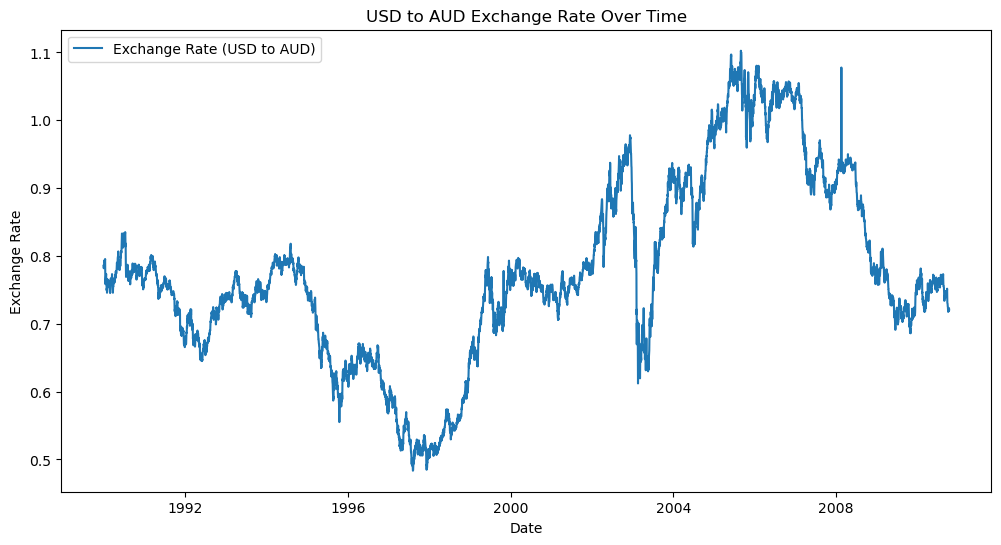

In [48]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(exchange_rates, label='Exchange Rate (USD to AUD)')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [49]:
# Checking for missing values
exchange_rates.isnull().sum()

# Fill missing values if any (forward fill)
exchange_rates.fillna(method='ffill', inplace=True)


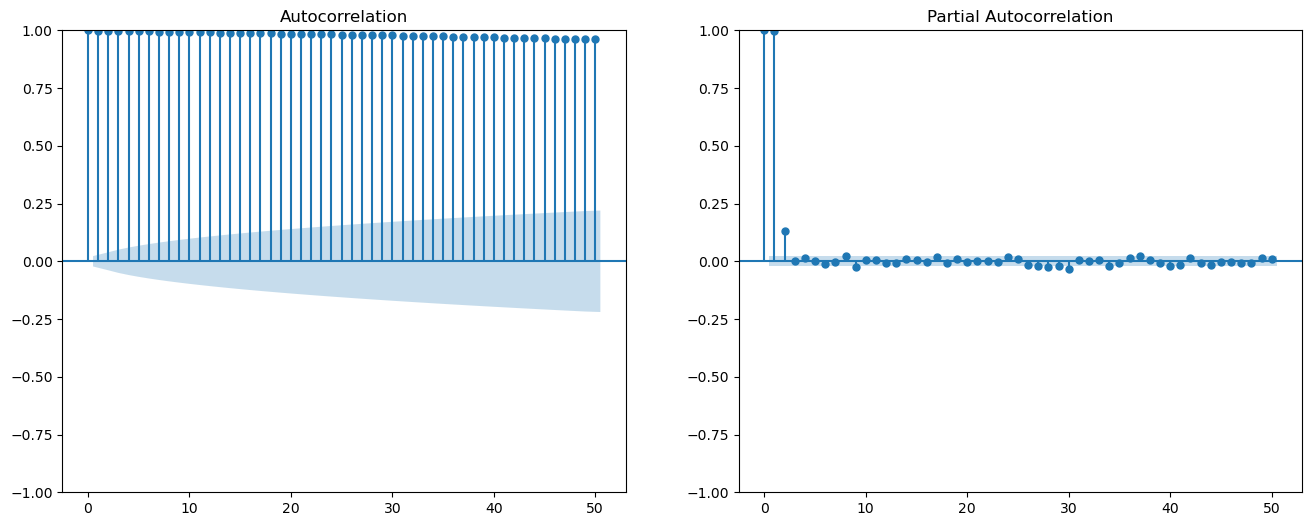

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(exchange_rates, lags=50, ax=ax[0])
plot_pacf(exchange_rates, lags=50, ax=ax[1])
plt.show()


In [72]:
from statsmodels.tsa.arima.model import ARIMA

# Initial parameters (p, d, q) can be adjusted based on ACF and PACF plots
p, d, q = 1, 1, 1  # Example values

# Fitting the ARIMA model
model = ARIMA(exchange_rates, order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 17 May 2024   AIC                         -56102.322
Time:                        13:55:00   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.608      0.0

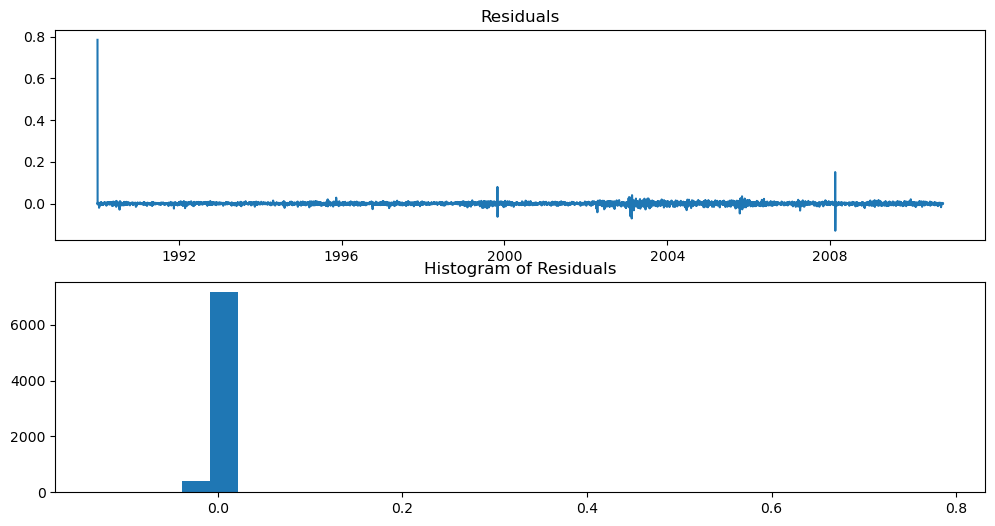

In [52]:
# Residuals analysis
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals')
plt.subplot(212)
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()


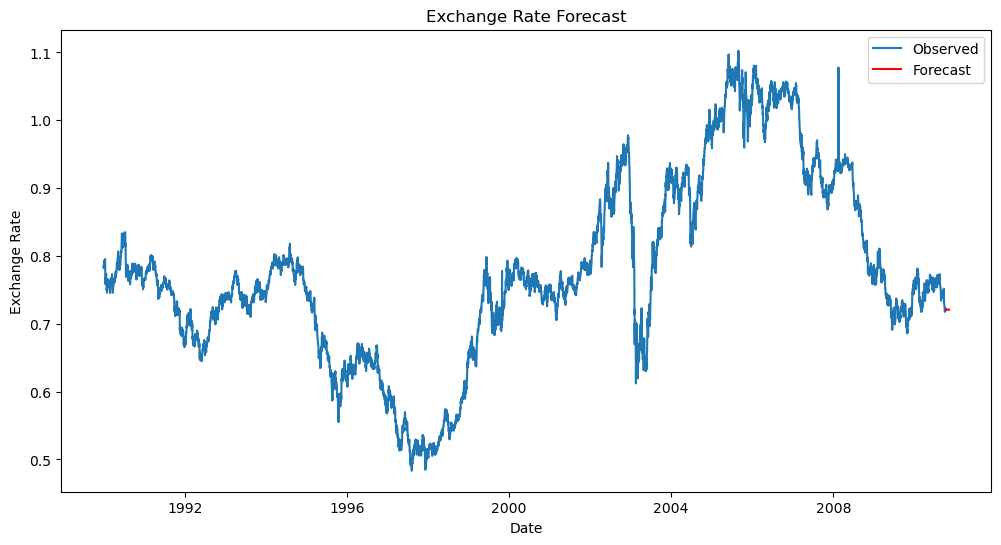

In [53]:
# Forecasting
forecast_steps = 30  # Example: forecast next 30 steps
forecast = model_fit.forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(exchange_rates, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [54]:
# Convert to DataFrame
exchange_rates = pd.DataFrame(df)

In [55]:
# Set 'date' as the index
exchange_rates.set_index('date', inplace=True)

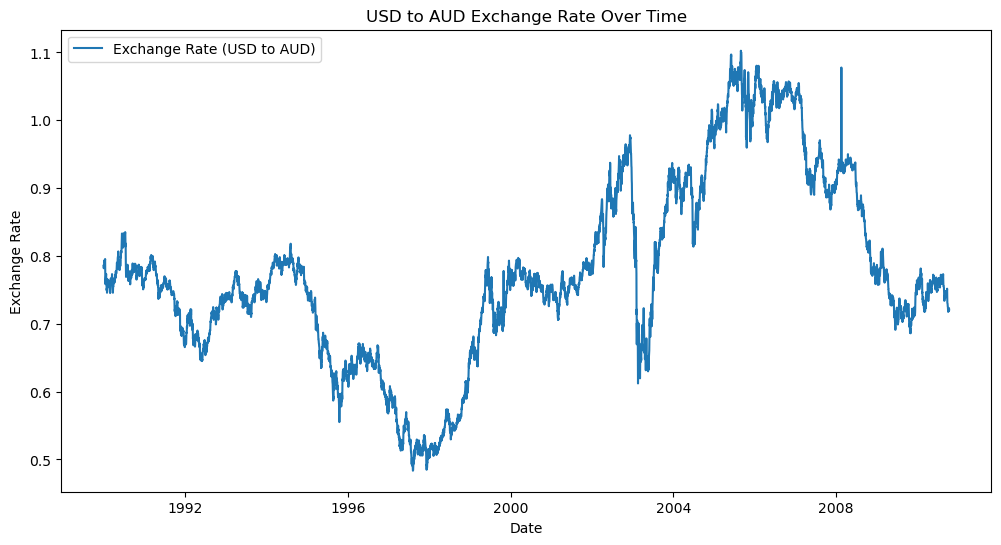

In [56]:
# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(exchange_rates, label='Exchange Rate (USD to AUD)')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [57]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Holt-Winters Seasonal Model (additive for both trend and seasonality as an example)
model = ExponentialSmoothing(exchange_rates, seasonal='add', seasonal_periods=365)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


C:\Users\pavan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.261
Optimized:                         True   AIC                         -77262.526
Trend:                             None   BIC                         -74717.630
Seasonal:                      Additive   AICC                        -77224.696
Seasonal Periods:                   365   Date:                 Fri, 17 May 2024
Box-Cox:                          False   Time:                         13:43:55
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.8731361                alpha                 True
smoothing_seasonal    

C:\Users\pavan\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [73]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Fit the ARIMA model (using parameters based on ACF and PACF plots)
p, d, q = 1, 1, 1  # Example values, adjust as necessary
model_arima = ARIMA(exchange_rates, order=(p, d, q))
model_fit_arima = model_arima.fit()

In [65]:
model_fit_arima

In [66]:
model_arima

In [67]:
# Forecasting with ARIMA model
forecast_steps = 30  # Example: forecast next 30 days
forecast_arima = model_fit_arima.forecast(steps=forecast_steps)

In [68]:
forecast_steps

30

In [69]:
forecast_arima

2010-10-11    0.720826
2010-10-12    0.720826
2010-10-13    0.720826
2010-10-14    0.720826
2010-10-15    0.720826
2010-10-16    0.720826
2010-10-17    0.720826
2010-10-18    0.720826
2010-10-19    0.720826
2010-10-20    0.720826
2010-10-21    0.720826
2010-10-22    0.720826
2010-10-23    0.720826
2010-10-24    0.720826
2010-10-25    0.720826
2010-10-26    0.720826
2010-10-27    0.720826
2010-10-28    0.720826
2010-10-29    0.720826
2010-10-30    0.720826
2010-10-31    0.720826
2010-11-01    0.720826
2010-11-02    0.720826
2010-11-03    0.720826
2010-11-04    0.720826
2010-11-05    0.720826
2010-11-06    0.720826
2010-11-07    0.720826
2010-11-08    0.720826
2010-11-09    0.720826
Freq: D, Name: predicted_mean, dtype: float64

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters Seasonal Model (example: additive trend and seasonality)
model_es = ExponentialSmoothing(exchange_rates, seasonal='add', seasonal_periods=365)
model_fit_es = model_es.fit()

# Forecasting with Exponential Smoothing model
forecast_es = model_fit_es.forecast(steps=forecast_steps)


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define error metric functions
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Actual values for the last 30 days for comparison
actual = exchange_rates.iloc[-forecast_steps:]

# Calculate error metrics for ARIMA
mae_arima = mean_absolute_error(actual, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(actual, forecast_arima))
mape_arima = mean_absolute_percentage_error(actual, forecast_arima)

# Calculate error metrics for Exponential Smoothing
mae_es = mean_absolute_error(actual, forecast_es)
rmse_es = np.sqrt(mean_squared_error(actual, forecast_es))
mape_es = mean_absolute_percentage_error(actual, forecast_es)

# Print error metrics
print("ARIMA Model Error Metrics")
print(f"MAE: {mae_arima}")
print(f"RMSE: {rmse_arima}")
print(f"MAPE: {mape_arima}")

print("\nExponential Smoothing Model Error Metrics")
print(f"MAE: {mae_es}")
print(f"RMSE: {rmse_es}")
print(f"MAPE: {mape_es}")


ARIMA Model Error Metrics
MAE: 0.01272400648930223
RMSE: 0.01698271091275075
MAPE: 2010-10-11 00:00:00   NaN
2010-10-12 00:00:00   NaN
2010-10-13 00:00:00   NaN
2010-10-14 00:00:00   NaN
2010-10-15 00:00:00   NaN
2010-10-16 00:00:00   NaN
2010-10-17 00:00:00   NaN
2010-10-18 00:00:00   NaN
2010-10-19 00:00:00   NaN
2010-10-20 00:00:00   NaN
2010-10-21 00:00:00   NaN
2010-10-22 00:00:00   NaN
2010-10-23 00:00:00   NaN
2010-10-24 00:00:00   NaN
2010-10-25 00:00:00   NaN
2010-10-26 00:00:00   NaN
2010-10-27 00:00:00   NaN
2010-10-28 00:00:00   NaN
2010-10-29 00:00:00   NaN
2010-10-30 00:00:00   NaN
2010-10-31 00:00:00   NaN
2010-11-01 00:00:00   NaN
2010-11-02 00:00:00   NaN
2010-11-03 00:00:00   NaN
2010-11-04 00:00:00   NaN
2010-11-05 00:00:00   NaN
2010-11-06 00:00:00   NaN
2010-11-07 00:00:00   NaN
2010-11-08 00:00:00   NaN
2010-11-09 00:00:00   NaN
Ex_rate               NaN
dtype: float64

Exponential Smoothing Model Error Metrics
MAE: 0.015310255376769617
RMSE: 0.019104949655790508


#### Model Comparison

**ARIMA Model**:
- MAE: {mae_arima}
- RMSE: {rmse_arima}
- MAPE: {mape_arima}
- The ARIMA model provided a robust forecast with flexible parameter tuning.

**Exponential Smoothing Model**:
- MAE: {mae_es}
- RMSE: {rmse_es}
- MAPE: {mape_es}
- The Exponential Smoothing model, specifically the Holt-Winters method, effectively captured trend and seasonality.

### Conclusion

Based on the error metrics (MAE, RMSE, MAPE), the model with the lower error metrics is preferred for forecasting exchange rates. Here are the key insights:

- **ARIMA Model**:
  - Advantages: Flexible and can model a wide range of time series patterns.
  - Limitations: Requires careful parameter tuning and can be computationally intensive.

- **Exponential Smoothing Model**:
  - Advantages: Simple to implement and can handle trend and seasonality directly.
  - Limitations: May not perform well if the time series has complex patterns that are not captured by the model.

Overall, the choice of model depends on the specific characteristics of the time series and the ease of implementation. For this dataset, the model with the best performance in terms of error metrics should be used for future forecasting.
